In [166]:
import pandas as pd
import numpy as np

In [167]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
x_train.shape

(60000, 28, 28)

In [170]:
single_image = x_train[0]

In [171]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [172]:
single_image.shape

(28, 28)

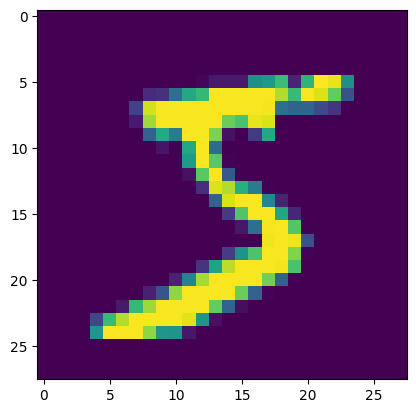

In [173]:
plt.imshow(single_image)

# PreProcessing Data


## Labels

In [174]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [175]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand

In [176]:
from tensorflow.keras.utils import to_categorical

In [177]:
y_train.shape

(60000,)

In [178]:
y_example = to_categorical(y_train)

In [179]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [180]:
y_example.shape

(60000, 10)

In [181]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [182]:
y_cat_test = to_categorical(y_test,10)

In [183]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

normalizing the X data

In [184]:
single_image.max()

255

In [185]:
single_image.min()

0

In [186]:
x_train = x_train/255
x_test = x_test/255

In [187]:
scaled_single = x_train[0]

In [188]:
scaled_single.max()

1.0

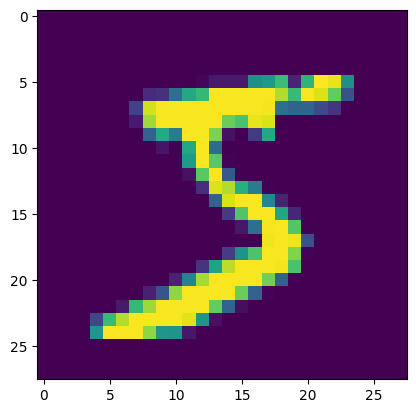

In [189]:
plt.imshow(scaled_single)

## Reshaping the Data


In [190]:
x_train.shape

(60000, 28, 28)

In [191]:
x_test.shape

(10000, 28, 28)

In [192]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [193]:
x_train.shape

(60000, 28, 28, 1)

In [194]:
x_test = x_test.reshape(10000,28,28,1)

In [195]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [197]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [198]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [199]:
from tensorflow.keras.callbacks import EarlyStopping

In [200]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [201]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1388 - accuracy: 0.9583 - val_loss: 0.0510 - val_accuracy: 0.9835
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0478 - val_accuracy: 0.9843
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0429 - val_accuracy: 0.9860
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0442 - val_accuracy: 0.9888
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0408 - val_accuracy:

## Evaluate the Model

In [202]:
model.metrics_names

['loss', 'accuracy']

In [203]:
losses = pd.DataFrame(model.history.history)

In [204]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.138763,0.958300,0.050952,0.9835
1,0.045793,0.986200,0.047828,0.9843
2,0.028702,0.990983,0.042924,0.9860
3,0.020048,0.993683,0.039091,0.9879
4,0.012841,0.995700,0.034303,0.9905


<Axes: >

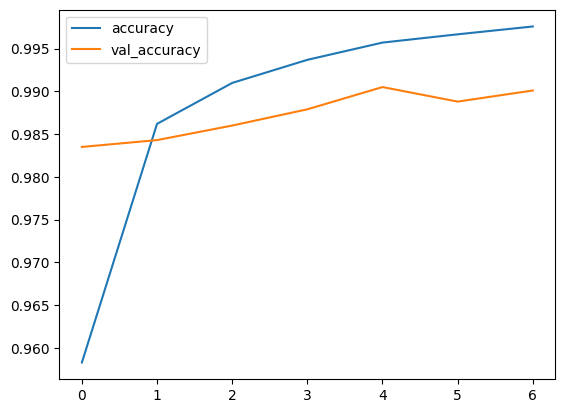

In [205]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

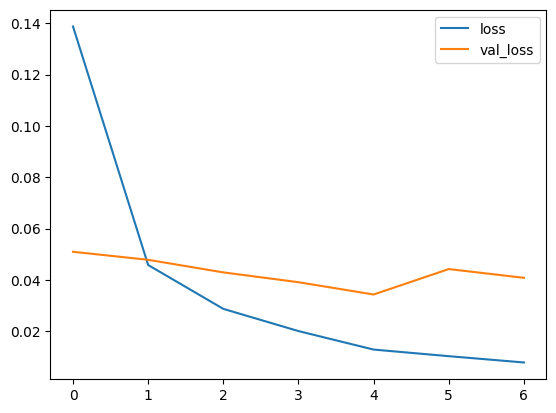

In [206]:
losses[['loss','val_loss']].plot()

In [207]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.040807075798511505, 0.9901000261306763]


In [208]:
from sklearn.metrics import classification_report,confusion_matrix

In [209]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [210]:
y_cat_test.shape

(10000, 10)

In [211]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [212]:
predictions[0]

7

In [213]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [214]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [215]:
confusion_matrix(y_test,predictions)

array([[ 974,    1,    0,    1,    0,    0,    3,    0,    1,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   3,    2, 1011,    2,    1,    0,    3,    7,    3,    0],
       [   0,    0,    0, 1006,    0,    2,    0,    1,    1,    0],
       [   0,    0,    0,    0,  965,    0,    5,    0,    0,   12],
       [   1,    0,    0,    5,    0,  883,    2,    1,    0,    0],
       [   1,    2,    0,    0,    1,    1,  953,    0,    0,    0],
       [   0,    2,    2,    2,    0,    0,    0, 1016,    1,    5],
       [   3,    1,    1,    1,    0,    0,    2,    1,  961,    4],
       [   0,    1,    0,    4,    3,    2,    0,    1,    1,  997]])

In [216]:
import seaborn as sns

<Axes: >

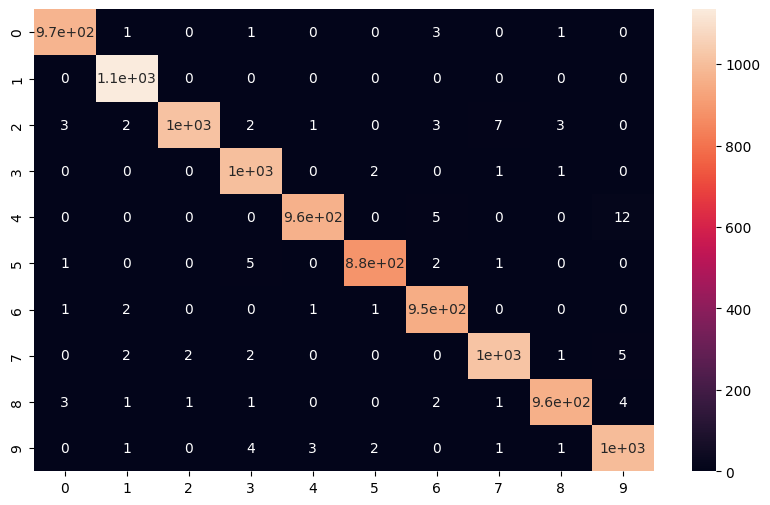

In [217]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [218]:
my_number = x_test[0]

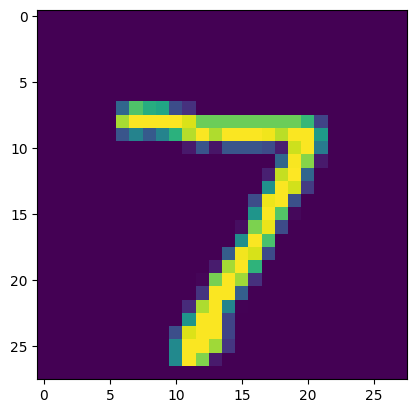

In [219]:
plt.imshow(my_number.reshape(28,28))

In [220]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

1/1 [==============================] - 0s 19ms/step


array([7])